# Artifical Friendship Construction and Explore the potential social information from the friendship network-visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import pickle

In [2]:
user_meetup = pd.read_csv('results/user_meetup_new.csv')

In [16]:
user_meetup['Included Rank'] = user_meetup['Included Rank'].astype('int32')

In [62]:
user_meetup = user_meetup.dropna()
user_meetup

,userid_x,userid_y,meetup,percent,SN-E ego,LZ-E ego,Pi ego,CE alter,KL alter,Pi alter,CE ego+alter,Pi ego+alter,Weight,Impact,Included Rank,CCE ego+alters,CCE alters,Pi alters,Pi ego+alters
0,fred-wilson,andrew-parker,10,0.035088,8.003259,6.059807,0.514013,7.062367,1.002560,0.415810,5.600320,0.557284,0.015719,0.015903,1,5.600320,7.062367,0.415810,0.557284
1,fred-wilson,bijan-sabet,6,0.021053,8.003259,6.059807,0.514013,7.821033,1.761225,0.337468,5.762551,0.542123,0.014352,0.014466,2,5.495602,7.083546,0.413674,0.567005
2,fred-wilson,caroline-mccarthy,5,0.017544,8.003259,6.059807,0.514013,9.118369,3.058561,0.192075,6.139219,0.506429,0.015133,0.015280,3,5.686781,7.529571,0.368031,0.549220
3,fred-wilson,mark-g,5,0.017544,8.003259,6.059807,0.514013,9.583830,3.524023,0.134228,6.368137,0.484389,0.014987,0.015136,4,5.847246,7.580211,0.362765,0.534158
4,fred-wilson,eric-spiegelman,4,0.014035,8.003259,6.059807,0.514013,8.769703,2.709896,0.232993,5.718428,0.546259,0.001806,0.001820,5,5.738637,7.390469,0.382406,0.544366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676295,mark-van-der-poel,simon-colijn,22,0.733333,4.585127,3.204491,0.708478,3.664927,0.460436,0.657968,2.944584,0.736171,0.566766,0.601831,1,2.944584,3.664927,0.657968,0.736171
676296,mark-van-der-poel,rene-sijnke,5,0.166667,4.585127,3.204491,0.708478,6.183090,2.978599,0.343603,3.448809,0.681909,0.320475,0.306636,2,3.180504,4.096832,0.608862,0.711059
676297,mark-van-der-poel,celine-lucas,1,0.033333,4.585127,3.204491,0.708478,9.031662,5.827171,-0.142373,3.596399,0.665604,0.047478,0.041190,3,3.308406,4.247919,0.591276,0.697242
676298,mark-van-der-poel,jordi-wiegerink,1,0.033333,4.585127,3.204491,0.708478,10.206009,7.001518,-0.284861,3.936778,0.627259,0.032641,0.025172,4,3.514634,4.509532,0.560303,0.674661


In [4]:
import seaborn as sns
import matplotlib.ticker as ticker
palette = sns.color_palette("colorblind")

## Distributions of Entropies and Cumulative Cross Entropy

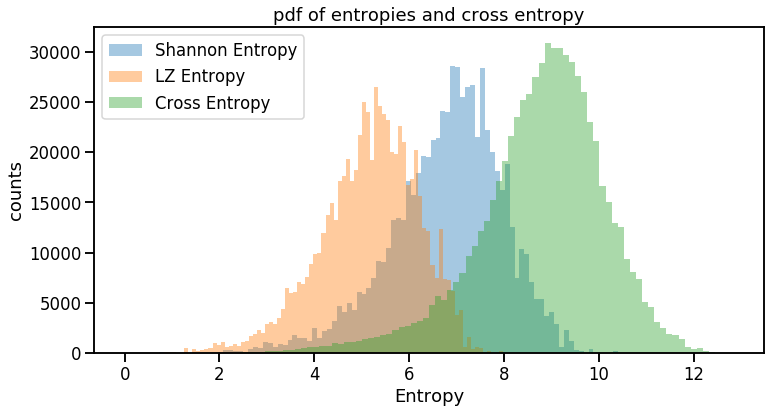

In [53]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_context('talk')
sns.distplot(user_meetup['SN-E ego'], label='Shannon Entropy', kde=False, bins=100)
sns.distplot(user_meetup['LZ-E ego'], label = 'LZ Entropy',  kde=False, bins=100)
sns.distplot(user_meetup['CE alter'], label='Cross Entropy',  kde=False, bins=100)
plt.title('pdf of entropies and cross entropy')
ax.set(xlabel='Entropy', ylabel='counts')
ax.legend()
plt.show()

## Distributions of predictabilities

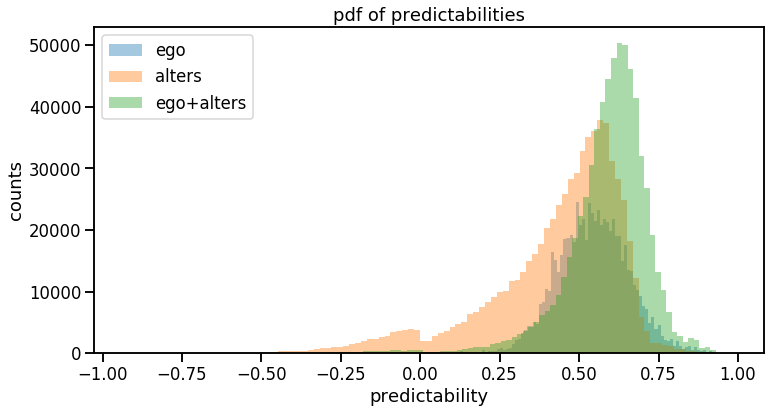

In [63]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_context('talk')
sns.distplot(user_meetup['Pi ego'], label='ego', bins = 100, kde=False)
sns.distplot(user_meetup['Pi alters'], label='alters', bins=100, kde=False)
sns.distplot(user_meetup['Pi ego+alters'], label = 'ego+alters', bins=100, kde=False)
plt.title('pdf of predictabilities')
ax.set(xlabel='predictability', ylabel='counts')
ax.legend()
plt.show()

## Entropies and predictabilities compare

In [56]:
CCE = pd.melt(user_meetup, id_vars=['Included Rank'], value_vars=['CCE ego+alters','CCE alters'], \
                  var_name = 'Cumulative Cross Entropy')

Text(0.5, 1.0, 'Different entropies for partial dataset (Alters < 250)')

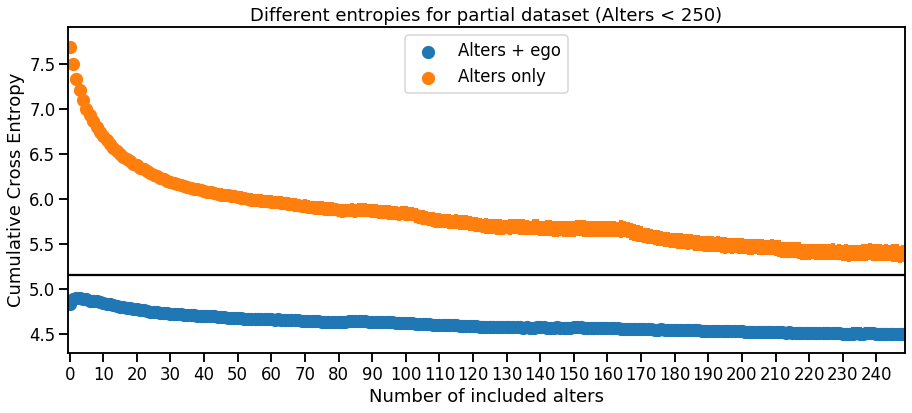

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="Included Rank", y="value", hue='Cumulative Cross Entropy', data=CCE[CCE['Included Rank'] < 250], \
              ci=95, join=False, ax=ax)
ax.axhline(y=user_meetup['LZ-E ego'].mean(), color='black')
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Alters + ego', 'Alters only'], loc=9)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Number of included alters', ylabel='Cumulative Cross Entropy')

plt.title('Different entropies for partial dataset (Alters < 250)')

In [58]:
baseline = user_meetup['Pi ego'].mean()
baseline

0.5448717945747807

In [59]:
CCE_Pi = pd.melt(user_meetup, id_vars=['Included Rank'], value_vars=['Pi ego+alters','Pi alters'], \
                  var_name = 'predictability')

Text(0.5, 1.0, 'Different predictabilities for partial dataset (Alters < 250)')

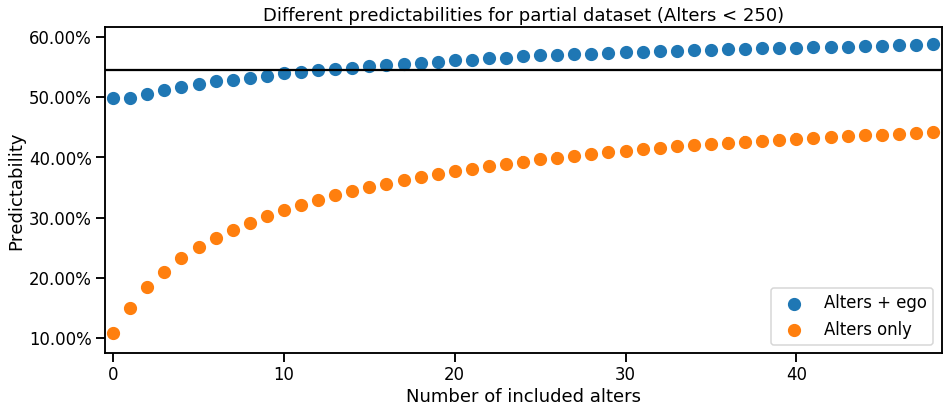

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="Included Rank", y="value", hue='predictability', data=CCE_Pi[CCE_Pi['Included Rank'] < 50], \
              ci=95, join=False, ax=ax)
ax.axhline(y=baseline, color='black')
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ['Alters + ego', 'Alters only'])

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Number of included alters', ylabel='Predictability')


plt.title('Different predictabilities for partial dataset (Alters < 250)')

## Baisc statistics for number of friends (as long as they have at least meetup), average alters for a ego is 103.4

In [46]:
user_meetup['Included Rank'].describe()

count    676300.000000
mean        103.412435
std         120.142350
min           1.000000
25%          19.000000
50%          59.000000
75%         147.000000
max        1069.000000
Name: Included Rank, dtype: float64

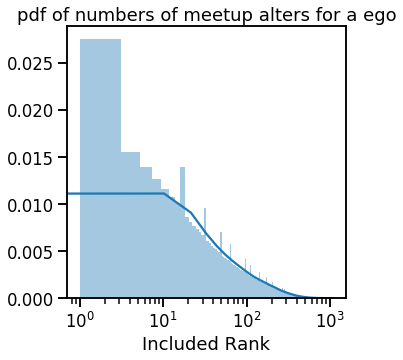

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(user_meetup['Included Rank'], bins=500)
ax.set_xscale('log')
plt.title('pdf of numbers of meetup alters for a ego')
plt.show()

## Baisc statistics for Weight and Impact

In [48]:
user_meetup['Weight'].describe()

count    676260.000000
mean          0.021158
std           0.070966
min           0.000000
25%           0.001949
50%           0.004622
75%           0.013529
max           1.000000
Name: Weight, dtype: float64

In [49]:
user_meetup['Impact'].describe()

count    676260.000000
mean          0.021158
std           0.072076
min           0.000000
25%           0.001909
50%           0.004534
75%           0.013249
max           1.000000
Name: Impact, dtype: float64

In [64]:
user_meetup[user_meetup['Pi ego+alters']<0]

,userid_x,userid_y,meetup,percent,SN-E ego,LZ-E ego,Pi ego,CE alter,KL alter,Pi alter,CE ego+alter,Pi ego+alter,Weight,Impact,Included Rank,CCE ego+alters,CCE alters,Pi alters,Pi ego+alters
8248,laurent-kretz,martin-recke,2,0.333333,5.680063,4.972017,0.394639,10.123047,5.151029,-0.469204,7.022768,-0.058405,0.142857,0.142857,1,7.022768,10.123047,-0.469204,-0.058405
8249,laurent-kretz,tijs-vrolix,2,0.333333,5.680063,4.972017,0.394639,8.517919,3.545901,-0.267016,5.954887,0.212591,0.142857,0.142857,2,6.867781,9.536955,-0.396763,-0.033529
8250,laurent-kretz,linda-lindstedt,1,0.166667,5.680063,4.972017,0.394639,9.368889,4.396872,-0.375737,6.440839,0.094528,0.071429,0.071429,3,6.863096,9.362545,-0.374941,-0.032753
8252,philip-kaplan,michael-diamant,6,0.084507,6.195017,5.726021,0.250241,8.122302,2.396281,-0.223124,6.621434,-0.000136,0.033019,0.040541,1,6.621434,8.122302,-0.223124,-0.000136
8253,philip-kaplan,dennis-yang,4,0.056338,6.195017,5.726021,0.250241,9.257103,3.531082,-0.370097,7.526860,-0.141467,0.070755,0.076577,2,7.145011,8.379017,-0.257161,-0.086028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675944,dekichi,kosuke-kamiya,1,0.111111,2.500000,2.400000,0.501308,5.177412,2.777412,-0.178327,4.133115,-0.042861,0.285714,0.300000,3,4.732021,5.448620,-0.212119,-0.121752
675945,dekichi,razorbeam,1,0.111111,2.500000,2.400000,0.501308,5.483025,3.083025,-0.216375,4.399942,-0.078485,0.285714,0.300000,4,4.798472,5.457328,-0.213197,-0.130289
676002,andika-alivano,olivia-willyost,1,1.000000,5.314494,4.645022,0.400631,9.118189,4.473167,-0.411785,6.302434,-0.015547,1.000000,1.000000,1,6.302434,9.118189,-0.411785,-0.015547
676005,ryusuke-ochiai,shinya-kamata,2,1.000000,4.729283,4.488123,0.288073,6.896770,2.408648,-0.251088,5.653605,-0.065350,1.000000,1.000000,1,5.653605,6.896770,-0.251088,-0.065350


In [65]:
user_meetup[user_meetup['Pi ego']<0]

,userid_x,userid_y,meetup,percent,SN-E ego,LZ-E ego,Pi ego,CE alter,KL alter,Pi alter,CE ego+alter,Pi ego+alter,Weight,Impact,Included Rank,CCE ego+alters,CCE alters,Pi alters,Pi ego+alters


In [66]:
# read picle file
pickle_in = open("user_placeidT.pickle", "rb")
user_placeidT = pickle.load(pickle_in)

In [74]:
ego = 'laurent-kretz'
ego_temporal_placeid = user_placeidT[ego]
ego_time = pd.to_datetime(ego_temporal_placeid.index).tolist()
ego_placeid = ego_temporal_placeid['placeid'].tolist()
N_uniq_placeid = len(set(ego_placeid))
length_ego = len(ego_placeid)

In [75]:
N_uniq_placeid

69

In [76]:
length_ego

99

In [73]:
import mpmath

# As required by algorithm, N should be large, we set e as the threshold of N. 
# if it is smaller than threshold, we will just print NA
def getPredictability(N, S, e=100):
    if N >= e:
        f = lambda x: (((1-x)/(N-1)) **(1-x))* x**x - 2**(-S)
        root = mpmath.findroot(f, 1)
        return float(root.real)
    else: 
        return np.nan

In [86]:
getPredictability(4000, 11, e=2)

0.12645185712835483